In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [122]:
df=pd.read_csv(r"D:\Excel R\Data Science Assignments\Multiple Linear Regression\50_startups.csv")

In [123]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [124]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [125]:
df.shape

(50, 5)

In [126]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [127]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [128]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [129]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

4 Bussiness moments

In [130]:
df.mean()

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [131]:
df.var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [132]:
df.std()

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

In [133]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [134]:
df.kurtosis()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

Data Pre-Processing

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [136]:
# df.isnull().sum()

In [137]:
df=df.rename({"R&D Spend":"R_D",
             "Administration":"Admin",
             "Marketing Spend":"MS"},axis=1)

In [141]:
df.head(6)

,R_D,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12


# Check For Outliers

In [ ]:
sns.boxplot(data=df)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

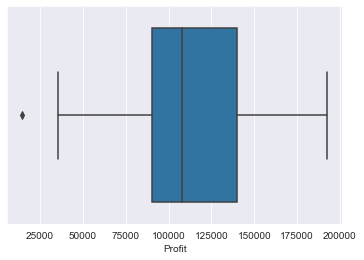

In [140]:
sns.boxplot(df.Profit) # Target variable containg the one Out liers it was based on Profit of the company so Neglet the Outliers

Plots and Graphs

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_D', ylabel='Density'>

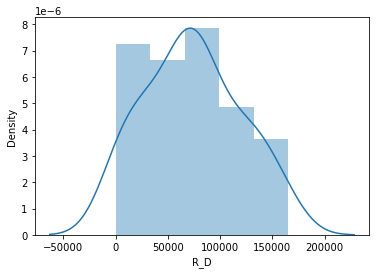

In [29]:
sns.distplot(df['R_D'])# Reasearch and Developement Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admin', ylabel='Density'>

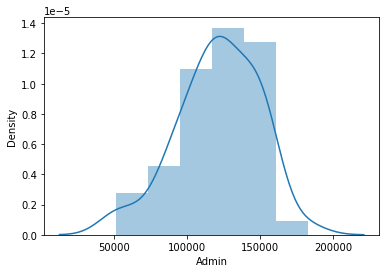

In [30]:
sns.distplot(df['Admin'])# Adminstartion Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

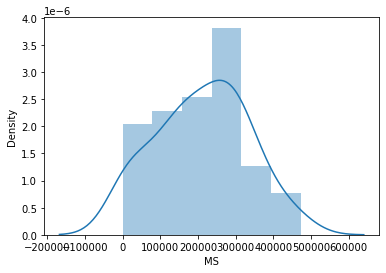

In [31]:
sns.distplot(df['MS'])# Marketing  Spend

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

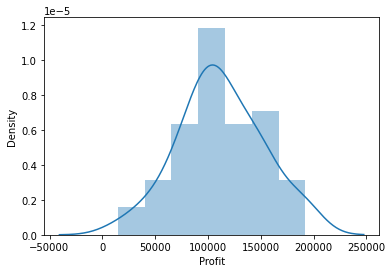

In [32]:
sns.distplot(df['Profit'])# Taeget Profit ## the profit the perfectly Normal Distribution. data ranges betwween -5000 to 250000

Correlation Between Variables

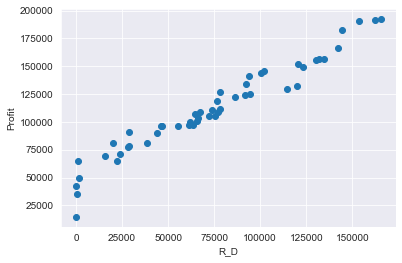

In [142]:
# Here the Relationship between =========> postive Corelation +1
plt.scatter(x='R_D',y='Profit',data=df)
plt.xlabel('R_D')
plt.ylabel('Profit')
plt.show()

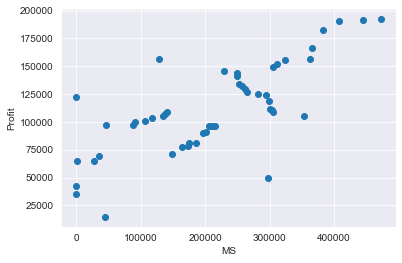

In [143]:
# Here the Relationship between =========> postive Corelation 1
plt.scatter(x='MS',y='Profit',data=df)
plt.xlabel('MS')
plt.ylabel('Profit')
plt.show()

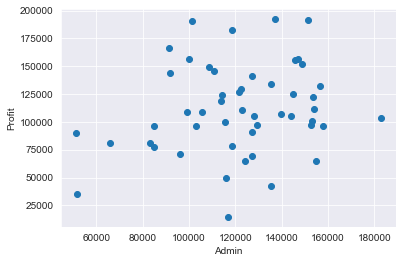

In [144]:
# Here the Relationship  =========> No Corelation between Profit and Admin 0
plt.scatter(x='Admin',y='Profit',data=df)
plt.xlabel('Admin')
plt.ylabel('Profit')
plt.show()

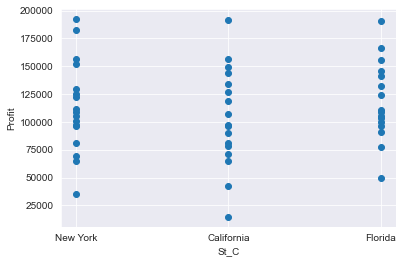

In [146]:
plt.scatter(x='State',y='Profit',data=df)
plt.xlabel('St_C')
plt.ylabel('Profit')
plt.show()

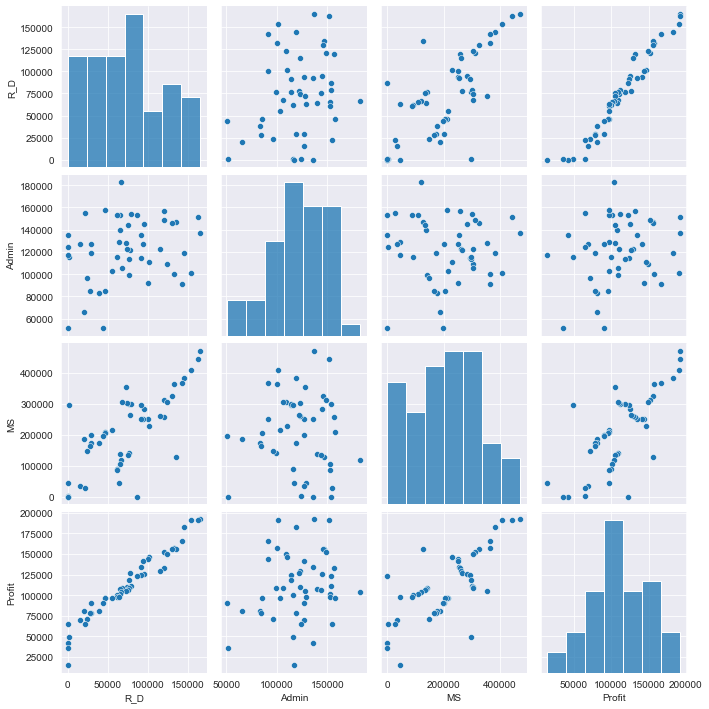

In [147]:
##plot Scatter plot between all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

Correlation Matrix

In [148]:
#Now Checking the Corelation between the parameters
df.corr()

,R_D,Admin,MS,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [149]:
import statsmodels.formula.api as smf
all_variables=smf.ols("Profit~R_D+Admin+MS+State",data=df).fit()

In [150]:
all_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.34e-27
Time:                        17:25:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R_D                   0.8060      0.046     17.369      0.000       0.712       0.900
Admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                    0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
#mdl_stc=smf.ols("Profit~St_C",data=df).fit()
#mdl_stf=smf.ols("Profit~St_F",data=df).fit()
#mdl_stny=smf.ols("Profit~St_NY",data=df).fit()
#mdl_stc.summary()
#mdl_stf.summary()
#mdl_stny.summary()

In [152]:
#mdl_stf.summary()

In [153]:
#mdl_stny.summary()

Here Overall State Feature contain three Cateories  which are explaining  or  predicting only  a little amount of data(0.001+0.014+0.021)% of data ==> Here again we  decided to Drop the State all_categories because it predicitng a very low percentage of data .

In [154]:
mdl_pro=smf.ols("Profit~R_D",data=df).fit() ## 94 percentage
mdl_pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.50e-32
Time:                        17:26:29   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_D            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
mdl_adm=smf.ols("Profit~Admin",data=df).fit() ## 0.04 precentage
mdl_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.162
Time:                        17:26:30   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
mdl_ms=smf.ols("Profit~MS",data=df).fit() # .559 percentage
mdl_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.38e-10
Time:                        17:26:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
BY Combinig Both Highly Performing and Higly Predciting Variables MS &  R_D

In [164]:
mdl_both=smf.ols("Profit~MS+R_D",data=df).fit()
mdl_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.16e-31
Time:                        17:28:36   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
Now Remove the In-Significant value in model(mdl_both) and add admin to it


SyntaxError: invalid syntax (<ipython-input-165-fa2168f2a6d3>, line 1)

In [166]:
with_adm=smf.ols("Profit~Admin+R_D",data=df).fit()
with_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.29e-31
Time:                        17:28:37   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
R_D            0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By Comparing the Both above model model with (mdl_both)has high R^2 and low AIC values

In [167]:
final_mdl=smf.ols("Profit~MS+Admin+R_D",data=df).fit()
final_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.53e-30
Time:                        17:28:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
R_D            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculate Vif 

In [168]:
ad_vif=smf.ols("Admin~Profit+R_D+MS+State",data=df).fit().rsquared
vif_ad= 1/(1-ad_vif)

ms_vif=smf.ols("MS~Profit+R_D+Admin+State",data=df).fit().rsquared
vif_ms= 1/(1-ms_vif)

rd_vif=smf.ols("R_D~Profit+Admin+MS+State",data=df).fit().rsquared
vif_rd= 1/(1-rd_vif)

pro_vif=smf.ols("Profit~R_D+Admin+MS+State",data=df).fit().rsquared
vif_pro= 1/(1-pro_vif)

d1={"Variables":['Admin','R_D','MS','Profit'],'VIF':[vif_ad,vif_rd,vif_ms,vif_pro]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Admin,1.184921
1,R_D,19.604937
2,MS,2.552858
3,Profit,20.305593


In [80]:
## Here we are NOt Removing the R_D variable because it was  highly correlated with the Target variable

Model Validation Techniques

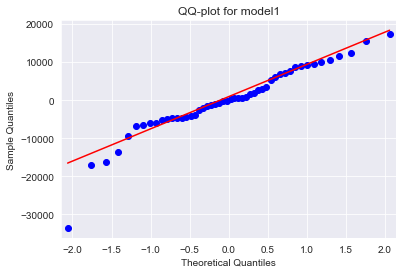

In [169]:
import statsmodels.api as sm
qqplot=sm.qqplot(final_mdl.resid,line='q')
plt.title('QQ-plot for model1')
plt.show()

In [170]:
list(np.where(final_mdl.resid<(-16000)))

[array([14, 15, 49], dtype=int64)]

In [171]:
## Here we are going to Standardize the data
def get_stnd_data(vals):
    return(vals-vals.mean())/vals.std()

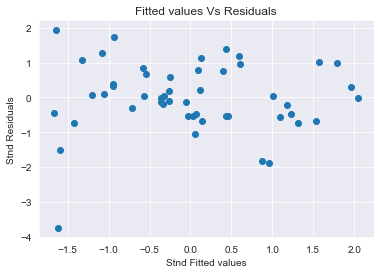

In [172]:
plt.scatter(get_stnd_data(final_mdl.fittedvalues),
           get_stnd_data(final_mdl.resid))

plt.title("Fitted values Vs Residuals")
plt.xlabel('Stnd Fitted values')
plt.ylabel('Stnd Residuals')
plt.show()

In [ ]:
# NO Pattern Found the data

Residuals Vs Regressors

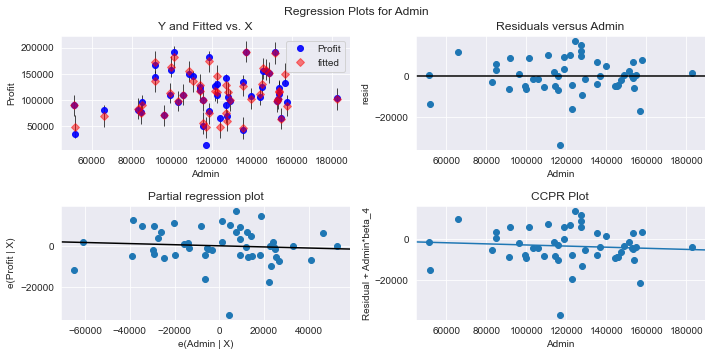

In [173]:
#2
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(all_variables,"Admin",fig=fig)
plt.show()

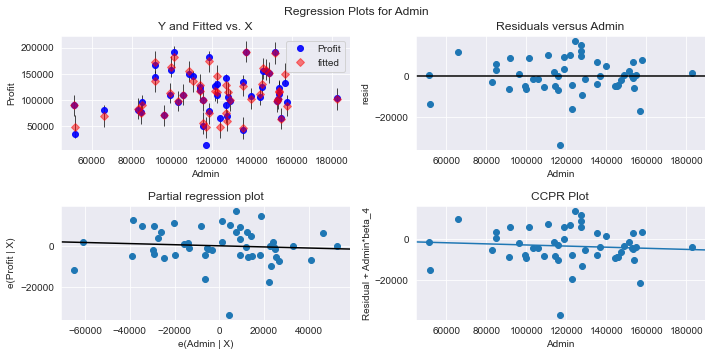

In [174]:
#2
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(all_variables,"Admin",fig=fig)
plt.show()

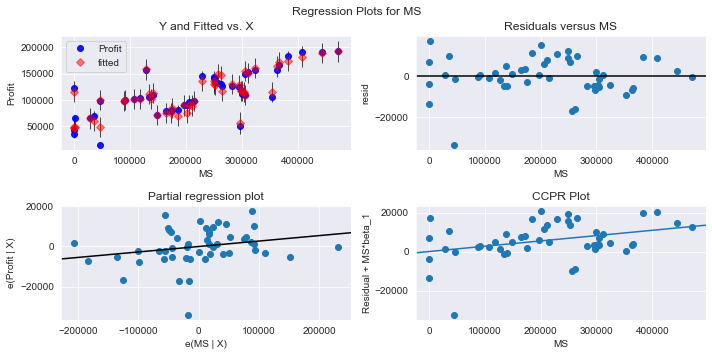

In [175]:
#2
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(final_mdl,"MS",fig=fig)
plt.show()

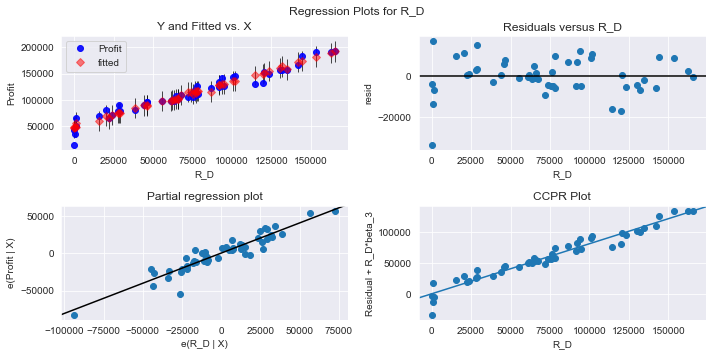

In [176]:
#2
fig =plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(final_mdl,"R_D",fig=fig)
plt.show()

Model Deletion Diagnostics
#cooks Distance and Influence PLot  which helps in Detecting the outliers  and Influential observations

In [177]:
model_influence=final_mdl.get_influence()
(c,_) = model_influence.cooks_distance

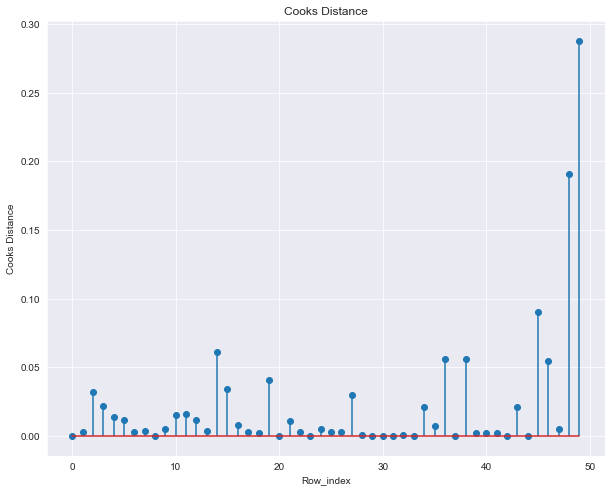

In [178]:
fig=plt.subplots(figsize=(10,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row_index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance')
plt.show()

In [179]:
(np.argmax(c),np.max(c)) # 49 th one placed in 0.283..

(49, 0.2880822927543258)

High Influence Plots

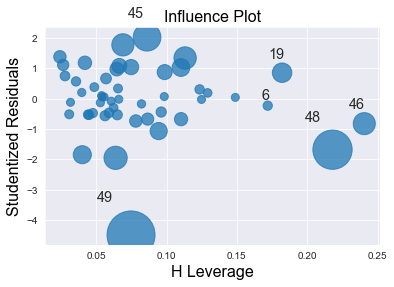

In [180]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_mdl)
plt.show()

In [181]:
# Calculate the Liverage Vlaue (3*(k+1)/n)
k=df.shape[1]
n=df.shape[0]
lv= 3*((k+1)/n)
lv

0.36

In [182]:
df[df.index.isin([49,48,46])]

,R_D,Admin,MS,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# df.head()

In [183]:
# By obesrving the above R_D and MS have very low  values in the observations of 46,48,49 

# Improving the Final Model

In [184]:
data=df.drop(df.index[[46,48,49]],axis=0).reset_index()

In [185]:
data.shape

(47, 6)

In [186]:
model1=smf.ols("Profit~R_D+MS+Admin+State",data=data).fit()
model1.rsquared,model1.aic


(0.961478415327212, 977.169091175738)

In [187]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           7.33e-28
Time:                        17:30:13   Log-Likelihood:                -482.58
No. Observations:                  47   AIC:                             977.2
Df Residuals:                      41   BIC:                             988.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.845e+04   6101.960      9.579      0.000    4.61e+04    7.08e+04
State[T.Florida]   -611.7470   2730.032     -0.224      0.824   -6125.158    4901.664
State[T.New York]  -620.5791   2662.021     -0.233      0.817   -5996.639    4755.481
R_D                   0.7646      0.042     18.275      0.000       0.680       0.849
MS                    0.0254      0.015      1.669      0.103      -0.005       0.056
Admin                -0.0525      0.045     -1.157      0.254      -0.144       0.039
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.531
Skew:                           0.062   Prob(JB):                        0.767
Kurtosis:                       2.494   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
model2=smf.ols("Profit~MS+State+Admin",data=data).fit() ## Without R_D
model2.rsquared,model2.aic

(0.6476747542872643, 1079.1958839952283)

In [192]:
model3=smf.ols("Profit~R_D+Admin+State",data=data).fit()## OUt MS
model3.rsquared,model3.aic

(0.9588601581746694, 978.2597319517015)

In [201]:
model4=smf.ols("Profit~R_D+Admin+MS",data=data).fit()##State
model4.rsquared,model4.aic

(0.9614129113440602, 973.2489443962854)

In [202]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.12e-30
Time:                        17:44:20   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
R_D            0.7642      0.041     18.704      0.000       0.682       0.847
Admin         -0.0532      0.044     -1.202      0.236      -0.142       0.036
MS             0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
model5=smf.ols("Profit~MS+R_D+State",data=data).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 26 May 2021   Prob (F-statistic):           8.29e-29
Time:                        17:44:21   Log-Likelihood:                -483.34
No. Observations:                  47   AIC:                             976.7
Df Residuals:                      42   BIC:                             985.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           5.21e+04   2682.921     19.421      0.000    4.67e+04    5.75e+04
State[T.Florida]   -706.3332   2739.799     -0.258      0.798   -6235.471    4822.804
State[T.New York]  -828.8465   2666.627     -0.311      0.757   -6210.317    4552.624
MS                    0.0325      0.014      2.328      0.025       0.004       0.061
R_D                   0.7447      0.038     19.443      0.000       0.667       0.822
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.306
Skew:                           0.052   Prob(JB):                        0.858
Kurtosis:                       2.618   Cond. No.                     8.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
d1 = {'Model':['All_variables','out_RD','out_MS','out_state','out_admin'],
      'R_Squared Value':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared]}
Rsq_frame=pd.DataFrame(d1)
Rsq_frame

,Model,R_Squared Value
0,All_variables,0.961478
1,out_RD,0.647675
2,out_MS,0.958860
3,out_state,0.961413
4,out_admin,0.960220


In [205]:
d2={'Model':['All_variables','out_RD','out_MS','out_state','out_admin'],
      'AIC vlaues':[model1.aic,model2.aic,model3.aic,model4.aic,model5.aic]}
Aic_frame=pd.DataFrame(d2)
Aic_frame

,Model,R_Squared Value
0,All_variables,977.169091
1,out_RD,1079.195884
2,out_MS,978.259732
3,out_state,973.248944
4,out_admin,976.679516


With This we can Conclude That the model model4==>out_state is the best predctive model for the data set having the highest R^2 and Low AIC values